# IMPORTING MODULES 

In [3]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Data Preprocessing

In [7]:
df = pd.read_excel('DryFruitss.xlsx')
df

DocDate                        Product Description  Total Sales  \
0     2021-10-02                        Brand Makhana 100Gm      1320.00   
1     2021-10-02                       Irani Kishmish 200Gm       280.00   
2     2021-10-02  Nescafe Gold Coffee Cappuccino 17Gm 1S Pk       990.00   
3     2021-10-03          Dashi Soup 50Gm Chicken Vegitable       360.00   
4     2021-10-03                       Sunflower Beej 100Gm       120.00   
...          ...                                        ...          ...   
77474 2024-07-28                Almond (Badam) Salted 100gm       340.00   
77475 2024-07-28                     Beej Long Salted 200Gm       410.00   
77476 2024-07-28                             Kishmish 250Gm      1200.00   
77477 2024-07-28                          Knorr Yakhni 5X4G       165.25   
77478 2024-07-29              Happy Home Hot&Sour Soup 63Gm       271.19   

              Group  GroupCode   Category2       Brand  
0      Dates & Nuts        114  Dry Fruits   Own Brand  
1      Dates & Nuts        114  Dry Fruits   Own Brand  
2      Tea & Coffee        106      Coffee     Nescafe  
3        Condiments        112        Soup       Dashi  
4      Dates & Nuts        114  Dry Fruits   Own Brand  
...             ...        ...         ...         ...  
77474  Dates & Nuts        114  Dry Fruits   Own Brand  
77475  Dates & Nuts        114  Dry Fruits   Own Brand  
77476  Dates & Nuts        114  Dry Fruits   Own Brand  
77477    Condiments        112        Soup       Knorr  
77478    Condiments        112        Soup  Happy Home  

[77479 rows x 7 columns]

In [167]:
df['Category2'].value_counts()

Category2
Dry Fruits    51242
Coffee        19194
Soup           7043
Name: count, dtype: int64

In [11]:
DryFruit = df.loc[df['Category2']=='Dry Fruits']

In [13]:
DryFruit['DocDate'].min(),DryFruit['DocDate'].max()

(Timestamp('2021-10-01 00:00:00'), Timestamp('2024-07-30 00:00:00'))

In [15]:
DryFruit.columns

Index(['DocDate', 'Product Description', 'Total Sales', 'Group', 'GroupCode',
       'Category2', 'Brand'],
      dtype='object')

In [19]:
DryFruit = DryFruit.sort_values('DocDate')

In [23]:
cols= ['Product Description', 'Group', 'GroupCode', 'Category2', 'Brand']
DryFruit.drop(cols, axis=1, inplace=True)
DryFruit.isnull().sum()

DocDate        0
Total Sales    0
dtype: int64

In [27]:
DryFruit = DryFruit.groupby('DocDate')['Total Sales'].sum().reset_index()

In [29]:
DryFruit = DryFruit.set_index('DocDate')
DryFruit.index

DatetimeIndex(['2021-10-01', '2021-10-02', '2021-10-03', '2021-10-04',
               '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-09', '2021-10-10',
               ...
               '2024-07-21', '2024-07-22', '2024-07-23', '2024-07-24',
               '2024-07-25', '2024-07-26', '2024-07-27', '2024-07-28',
               '2024-07-29', '2024-07-30'],
              dtype='datetime64[ns]', name='DocDate', length=1013, freq=None)

In [31]:
y = DryFruit['Total Sales'].resample('MS').mean()

In [33]:
y['2021':]

DocDate
2021-10-01     70918.982579
2021-11-01     79880.184729
2021-12-01    121572.266647
2022-01-01    120296.576212
2022-02-01     97675.806128
2022-03-01     98138.020297
2022-04-01    105298.363196
2022-05-01     80591.159453
2022-06-01     60179.979245
2022-07-01     98815.812960
2022-08-01    115000.074675
2022-09-01     88681.009492
2022-10-01    104081.431188
2022-11-01    115349.082700
2022-12-01    127539.518243
2023-01-01    127678.238062
2023-02-01     98250.177063
2023-03-01    104176.073974
2023-04-01    154594.091947
2023-05-01     81949.072278
2023-06-01    115181.560485
2023-07-01    122649.720065
2023-08-01    102352.664149
2023-09-01    114978.776374
2023-10-01    113166.316680
2023-11-01    120138.409518
2023-12-01    147271.797410
2024-01-01    153846.526855
2024-02-01    156612.136179
2024-03-01    155943.255548
2024-04-01    168937.277855
2024-05-01    107789.593757
2024-06-01    145048.214286
2024-07-01    161445.392570
Freq: MS, Name: Total Sales, dtype: floa

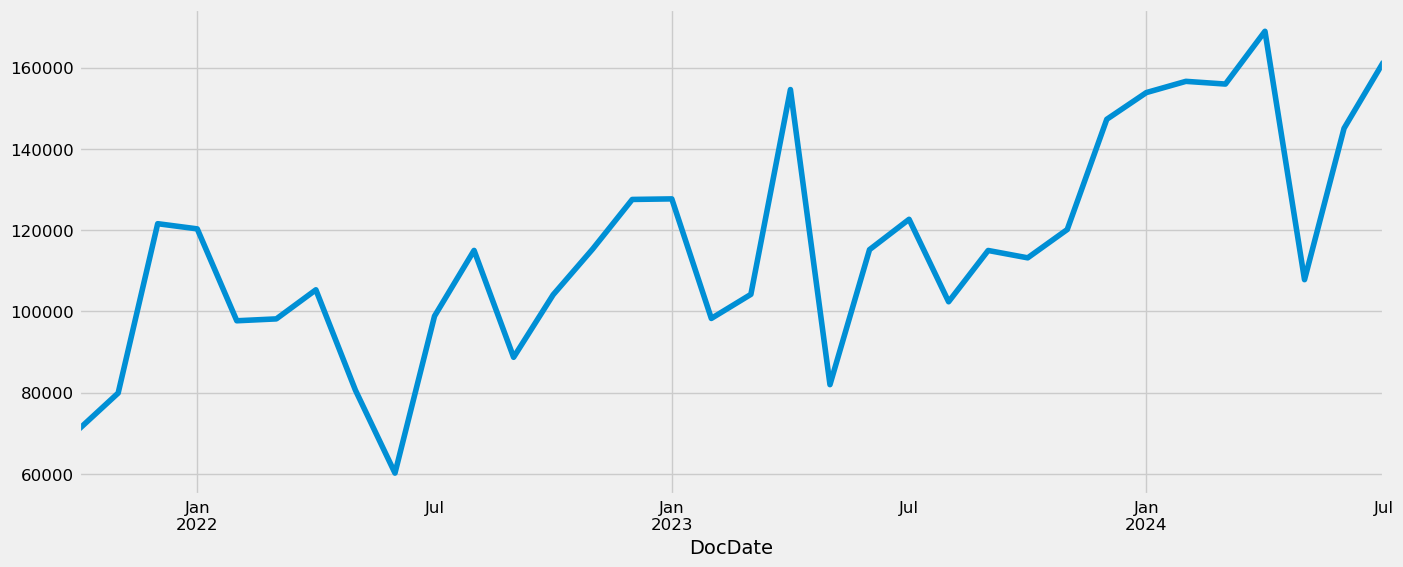

In [35]:
y.plot(figsize=(15,6))
plt.show()

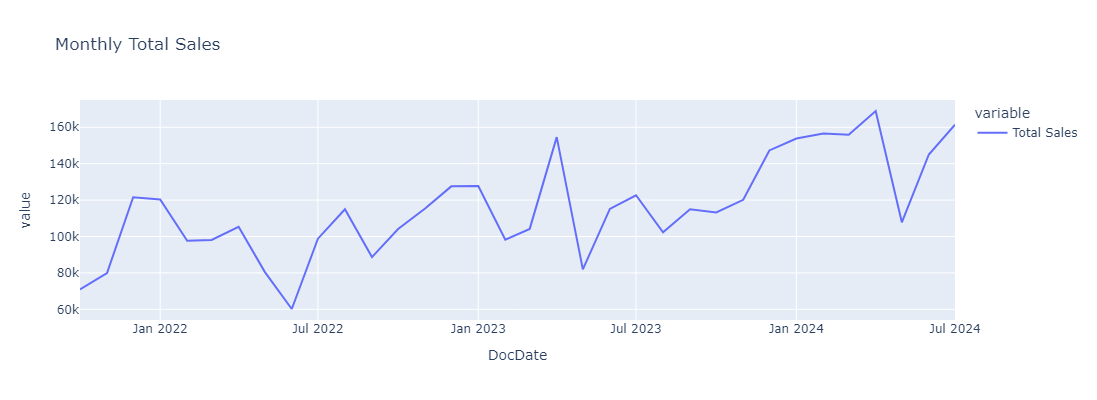

In [37]:
import plotly.express as px

# y = resampled data jo aap ne pehle calculate ki hai
fig = px.line(y, title='Monthly Total Sales')
fig.update_layout(width=800, height=400)  # aap width aur height adjust kar sakte hain
fig.show()


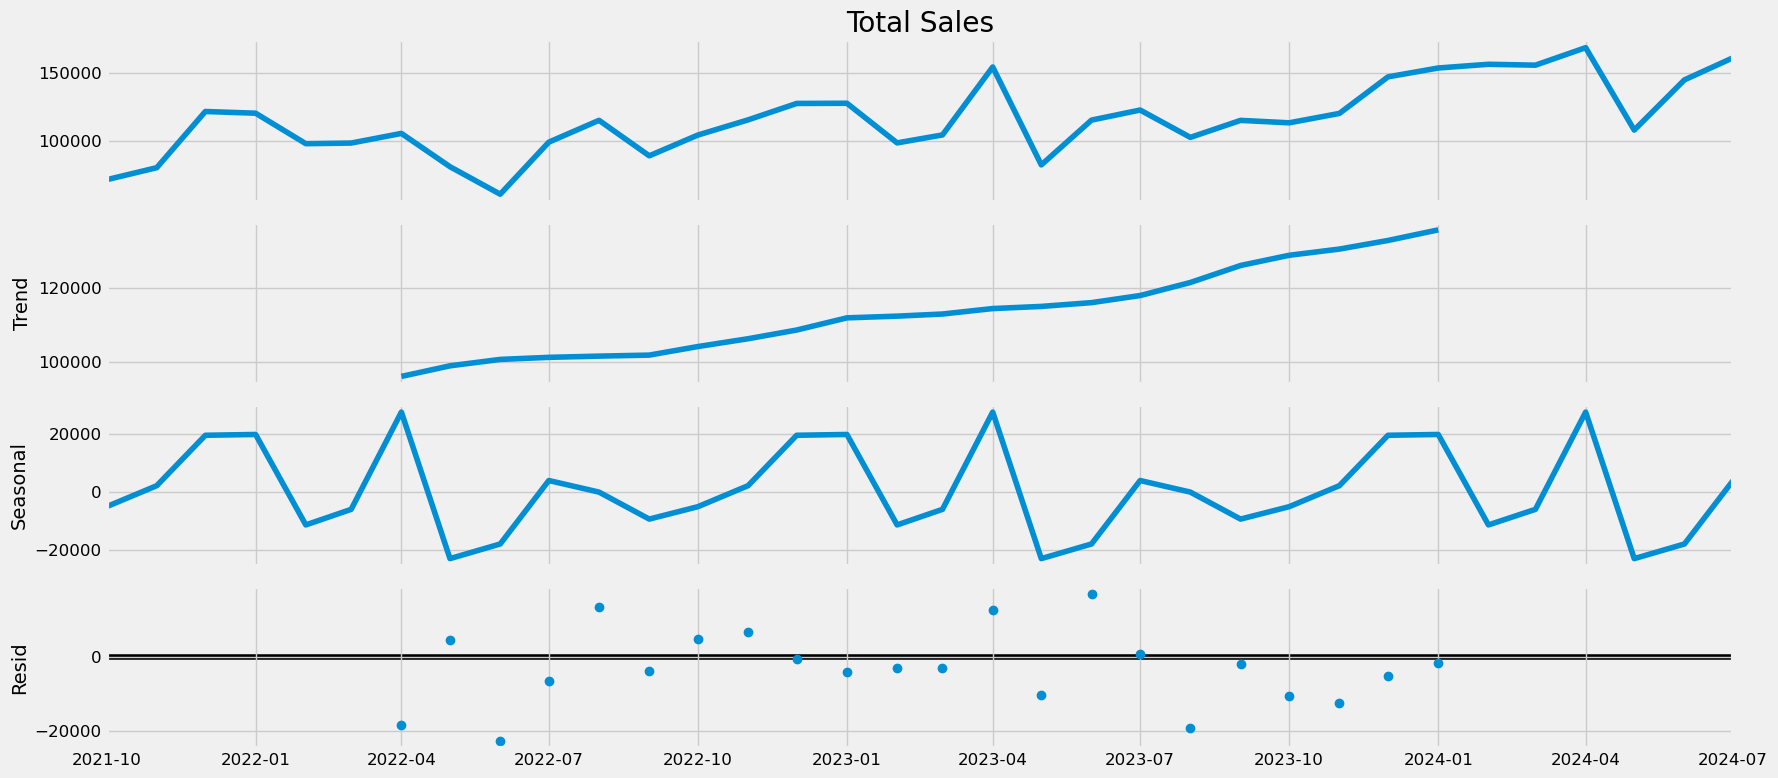

In [39]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# MODEL-TRAINING

In [41]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [43]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e:
            print(f"An error occurred: {e}")
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:867.5563445113112
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:671.127760285413
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:495.61951529028835
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:226.60736402830636
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:504.3156352530659
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:484.8896338667835
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:237.65373155828266
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:208.01555142874687
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:822.479672460523
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:514.9182994935009
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:468.60421734444554
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:189.8906052076332
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:562.1311645984985
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:513.5341371788031
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:234.8927925045943
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:189.88761517529196
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:745.6454060399933
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:466.37958087443184
ARIMA

In [44]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1876      2.264      0.083      0.934      -4.249       4.625
ma.L1         -0.9058      0.258     -3.513      0.000      -1.411      -0.401
ma.S.L12      -0.3985      0.779     -0.511      0.609      -1.926       1.129
sigma2      5.793e+08   8.46e-10   6.85e+17      0.000    5.79e+08    5.79e+08


In [59]:
# Step 2: Forecast karna (6 months ka forecast after July)
forecast_steps = 18  # Forecast for 6 months
forecast_values = results.forecast(steps=forecast_steps)

# Step 3: Forecasted values ko DataFrame mein dalna
forecast_index = pd.date_range(start='2024-08-01', periods=forecast_steps, freq='MS')  # Starting from August
forecast_df = pd.DataFrame({'Forecasted Sales': forecast_values}, index=forecast_index)

# Output dikhao
print(forecast_df)

            Forecasted Sales
2024-08-01     149082.495106
2024-09-01     149528.706660
2024-10-01     159403.564147
2024-11-01     167342.991224
2024-12-01     190599.663670
2025-01-01     194460.197520
2025-02-01     186890.888166
2025-03-01     187932.626214
2025-04-01     208494.831297
2025-05-01     151909.937370
2025-06-01     180308.669982
2025-07-01     195626.015307
2025-08-01     184838.334647
2025-09-01     185580.094359
2025-10-01     195510.403712
2025-11-01     203460.234880
2025-12-01     226718.859380
2026-01-01     230579.759482


In [83]:
# Forecast 5 months ahead (August to December)
forecast = results.get_forecast(steps=9)
forecast_df = forecast.summary_frame()

# Display the forecasted values
print(forecast_df)

Total Sales           mean       mean_se  mean_ci_lower  mean_ci_upper
2024-08-01   149082.495106  24091.879383  101863.279196  196301.711015
2024-09-01   149528.706660  25040.880341  100449.483052  198607.930269
2024-10-01   159403.564147  25295.482021  109825.330414  208981.797880
2024-11-01   167342.991224  25468.770808  117425.117710  217260.864738
2024-12-01   190599.663670  25625.617920  140374.375466  240824.951874
2025-01-01   194460.197520  25778.685572  143934.902230  244985.492809
2025-02-01   186890.888166  25930.406990  136068.224361  237713.551972
2025-03-01   187932.626214  26081.259733  136814.296465  239050.955963
2025-04-01   208494.831297  26231.355703  157082.318852  259907.343741


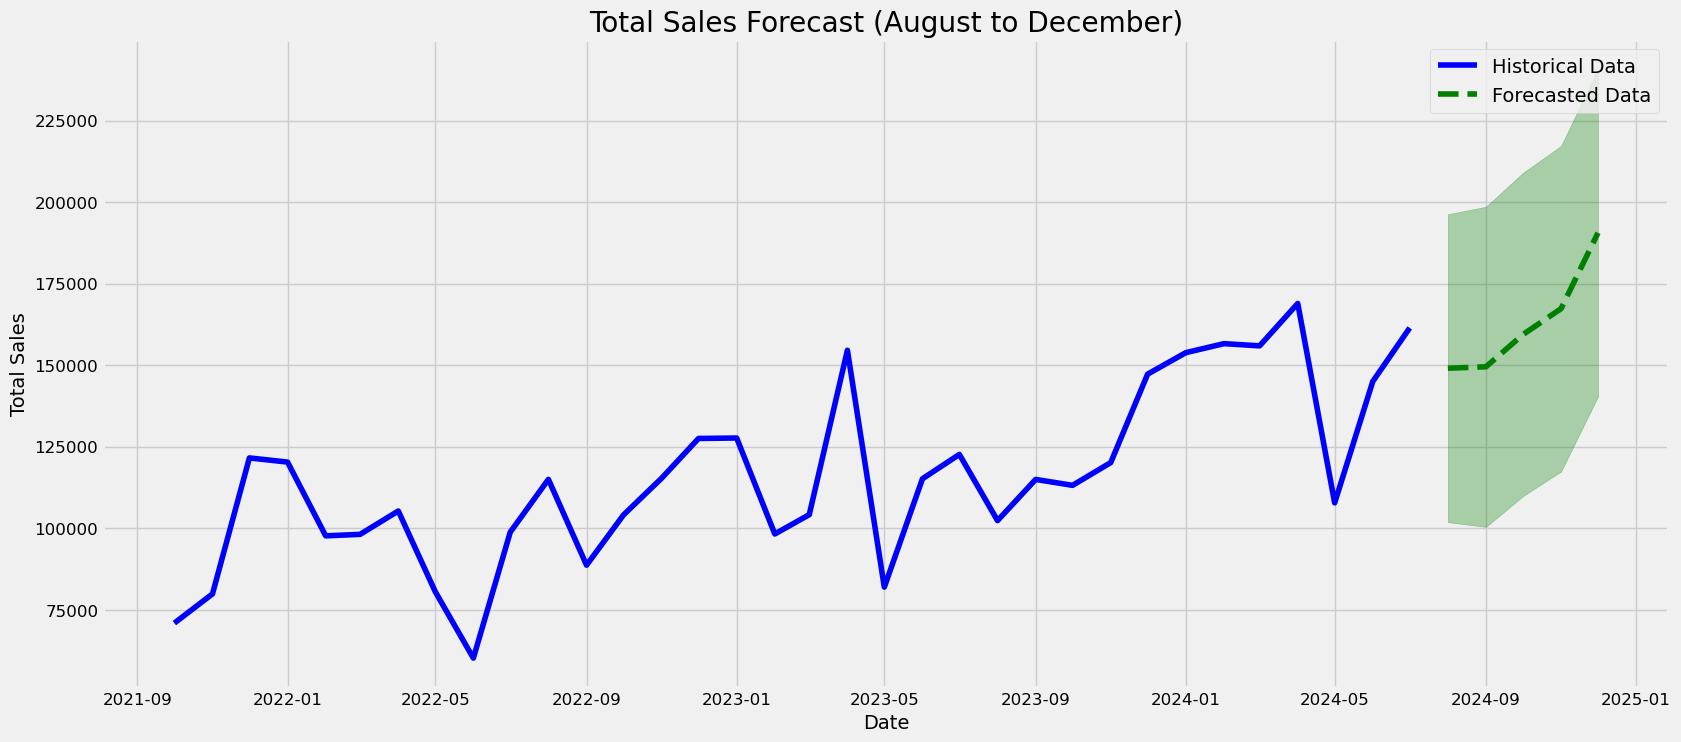

In [85]:
import matplotlib.pyplot as plt

# Step 1: Forecast 5 months ahead (August to December)
forecast = results.get_forecast(steps=5)
forecast_df = forecast.summary_frame()

# Step 2: Extract the forecasted values
forecasted_mean = forecast_df['mean']  # Forecasted sales
forecast_index = forecast_df.index  # Forecasted dates

# Step 3: Plot the historical data
plt.plot(y.index, y, label='Historical Data', color='blue')

# Step 4: Plot the forecasted data
plt.plot(forecast_index, forecasted_mean, label='Forecasted Data', color='green', linestyle='--')

# Step 5: Add labels and title
plt.fill_between(forecast_index,
                 forecast_df['mean_ci_lower'],
                 forecast_df['mean_ci_upper'], color='green', alpha=0.3)  # Confidence interval
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Forecast (August to December)')
plt.legend()

# Step 6: Show the plot
plt.show()


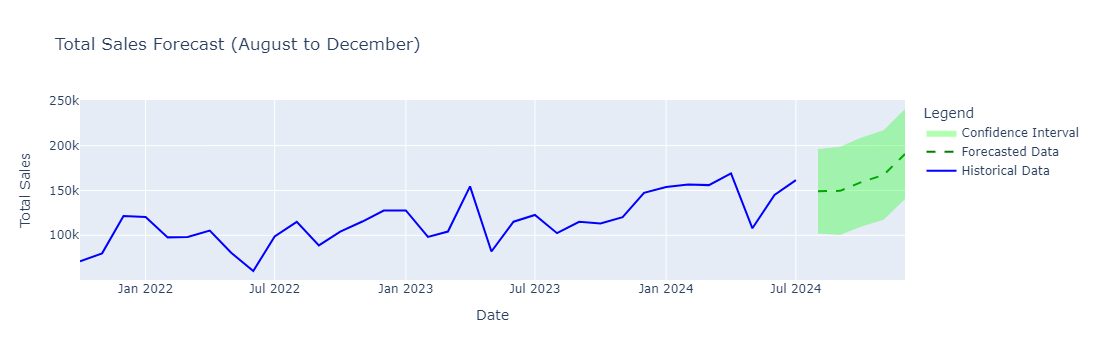

In [86]:
import plotly.graph_objects as go

# Step 1: Create a figure
fig = go.Figure()

# Step 2: Add historical data to the plot
fig.add_trace(go.Scatter(x=y.index, y=y, mode='lines', name='Historical Data', line=dict(color='blue')))

# Step 3: Add forecasted data to the plot
fig.add_trace(go.Scatter(x=forecast_index, 
                         y=forecast_df['mean'], 
                         mode='lines', 
                         name='Forecasted Data', 
                         line=dict(color='green', dash='dash'),
                         hoverinfo='text', 
                         text=forecast_df['mean'].apply(lambda x: f'Sales: {x:.2f}')))

# Step 4: Add confidence intervals
fig.add_trace(go.Scatter(x=forecast_index, 
                         y=forecast_df['mean_ci_lower'], 
                         mode='lines', 
                         line=dict(width=0), 
                         showlegend=False))
fig.add_trace(go.Scatter(x=forecast_index, 
                         y=forecast_df['mean_ci_upper'], 
                         mode='lines', 
                         line=dict(width=0), 
                         fill='tonexty', 
                         fillcolor='rgba(0, 255, 0, 0.3)', 
                         name='Confidence Interval'))

# Step 5: Update layout
fig.update_layout(title='Total Sales Forecast (August to December)',
                  xaxis_title='Date',
                  yaxis_title='Total Sales',
                  legend_title='Legend')

# Step 6: Show the interactive plot
fig.show()


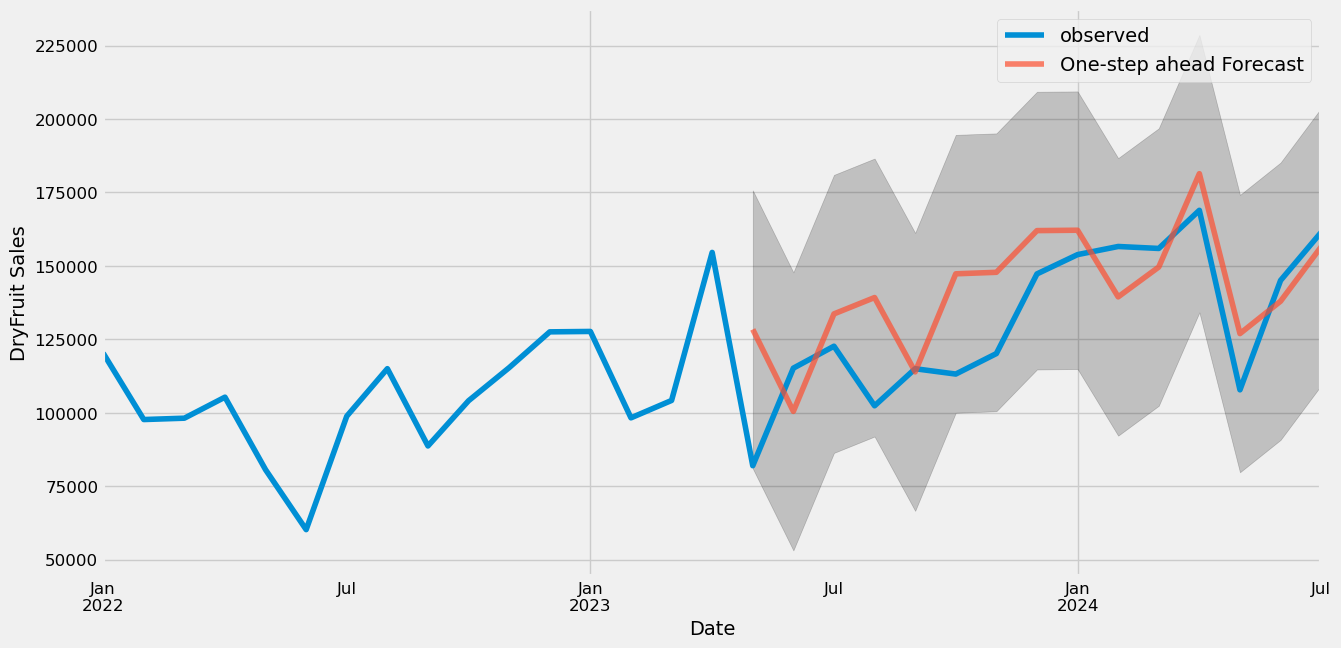

In [131]:
pred = results.get_prediction(start=pd.to_datetime('2023-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2022':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('DryFruit Sales')
plt.legend()
plt.show()

In [177]:
pred = results.get_prediction(start=pd.to_datetime('2023-05-01'), dynamic=False)
# pred = results.get_forecast(steps=1)
y_forecasted = pred.predicted_mean
y_truth = y['2023-05-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 466875276.05


In [179]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 21607.3


In [181]:
# Extract predicted mean values from the PredictionResults object
predicted_data = pred.predicted_mean  # This gives the mean forecast

# Extract confidence intervals
confidence_intervals = pred_ci

# Create the combined dataframe
df_combined = pd.DataFrame({
    'Observed': y['2023-05-01':'2024-07-01'],  # Adjust date range as needed
    'Predicted': predicted_data,  # Correctly extract predicted values
    'Lower CI': confidence_intervals.iloc[:, 0],  # Lower bound of CI
    'Upper CI': confidence_intervals.iloc[:, 1]   # Upper bound of CI
})

# Print the formatted dataframe
print(df_combined)

                 Observed      Predicted       Lower CI       Upper CI
DocDate                                                               
2023-05-01   81949.072278  128367.486682   81009.455973  175725.517391
2023-06-01  115181.560485  100454.664693   53106.875449  147802.453938
2023-07-01  122649.720065  133655.976346   86316.420544  180995.532148
2023-08-01  102352.664149  139224.236742   91891.274432  186557.199053
2023-09-01  114978.776374  113899.061767   66571.352336  161226.771197
2023-10-01  113166.316680  147304.634454   99984.999218  194624.269689
2023-11-01  120138.409518  147819.458266  100508.199814  195130.716718
2023-12-01  147271.797410  162018.219283  114727.460090  209308.978477
2024-01-01  153846.526855  162152.281010  114878.147749  209426.414272
2024-02-01  156612.136179  139445.769661   92185.130160  186706.409163
2024-03-01  155943.255548  149611.543881  102361.858441  196861.229320
2024-04-01  168937.277855  181409.830794  134169.035548  228650.626040
2024-0

In [175]:
df_combined.to_csv('dryfruitforecast.csv', index=False)  # `index=False` excludes the index column

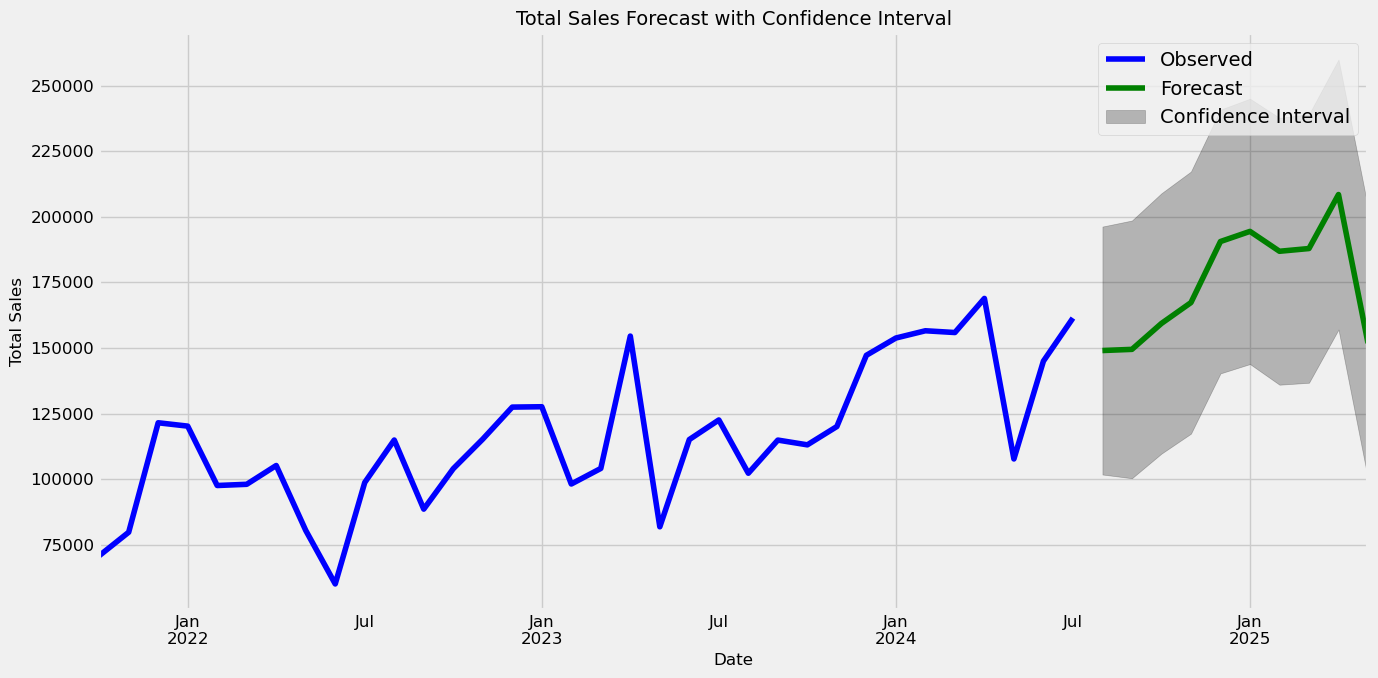

In [183]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'results' is your fitted SARIMAX model

# Step 1: Get the forecast for the next 10 periods
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()

# Step 2: Set up the plot
plt.figure(figsize=(14, 7))

# Step 3: Plot the observed data
ax = y.plot(label='Observed', color='blue')

# Step 4: Plot the forecasted mean
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='green')

# Step 5: Add the confidence intervals
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], 
                color='k', alpha=0.25, label='Confidence Interval')

# Step 6: Customize the plot
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Total Sales', fontsize=12)
ax.set_title('Total Sales Forecast with Confidence Interval', fontsize=14)
plt.legend()

# Step 7: Show the plot
plt.tight_layout()  # Adjusts the layout to make room for the labels
plt.show()


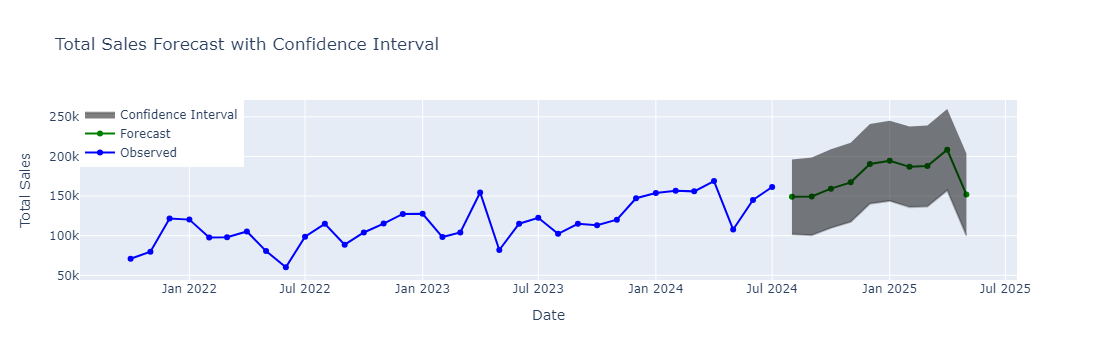

In [185]:
import pandas as pd
import plotly.graph_objects as go

# Assuming 'results' is your fitted SARIMAX model

# Step 1: Get the forecast for the next 10 periods
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()

# Prepare data for the observed and forecasted sales
observed_data = y
forecasted_mean = pred_uc.predicted_mean
forecasted_lower = pred_ci.iloc[:, 0]
forecasted_upper = pred_ci.iloc[:, 1]

# Step 2: Create the Plotly figure
fig = go.Figure()

# Step 3: Add observed data
fig.add_trace(go.Scatter(
    x=observed_data.index,
    y=observed_data,
    mode='lines+markers',
    name='Observed',
    line=dict(color='blue'),
    hoverinfo='text',
    text=[f'Sales: {value:,.2f}' for value in observed_data]
))

# Step 4: Add forecasted data
fig.add_trace(go.Scatter(
    x=forecasted_mean.index,
    y=forecasted_mean,
    mode='lines+markers',
    name='Forecast',
    line=dict(color='green'),
    hoverinfo='text',
    text=[f'Forecast: {value:,.2f}' for value in forecasted_mean]
))

# Step 5: Add confidence intervals
fig.add_trace(go.Scatter(
    x=pred_ci.index,
    y=forecasted_upper,
    fill=None,
    mode='lines',
    line=dict(color='rgba(0,0,0,0)'),
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=pred_ci.index,
    y=forecasted_lower,
    fill='tonexty',
    mode='lines',
    line=dict(color='rgba(0,0,0,0.25)'),
    name='Confidence Interval'
))

# Step 6: Customize layout
fig.update_layout(
    title='Total Sales Forecast with Confidence Interval',
    xaxis_title='Date',
    yaxis_title='Total Sales',
    legend=dict(x=0, y=1),
    hovermode='closest'
)

# Step 7: Show the plot
fig.show()


# FOR COFFE FORECAST 

# Data-Preprocessing

In [424]:
df.columns

Index(['DocDate', 'Product Description', 'Total Sales', 'Group', 'GroupCode',
       'Category2', 'Brand'],
      dtype='object')

In [426]:
df['Category2'].value_counts()

Category2
Dry Fruits    51242
Coffee        19194
Soup           7043
Name: count, dtype: int64

In [428]:
Coffee = df.loc[df['Category2']=='Coffee']

In [430]:
Coffee['DocDate'].min(),Coffee['DocDate'].max()

(Timestamp('2021-10-01 00:00:00'), Timestamp('2024-07-30 00:00:00'))

In [432]:
Coffee.columns

Index(['DocDate', 'Product Description', 'Total Sales', 'Group', 'GroupCode',
       'Category2', 'Brand'],
      dtype='object')

In [434]:
Coffee = Coffee.sort_values('DocDate')

In [436]:
cols= ['Product Description', 'Group', 'GroupCode', 'Category2', 'Brand']
Coffee.drop(cols, axis=1, inplace=True)
Coffee.isnull().sum()

DocDate        0
Total Sales    0
dtype: int64

In [438]:
Coffee = Coffee.groupby('DocDate')['Total Sales'].sum().reset_index()

In [440]:
Coffee = Coffee.set_index('DocDate')
Coffee.index

DatetimeIndex(['2021-10-01', '2021-10-02', '2021-10-03', '2021-10-04',
               '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-09', '2021-10-10',
               ...
               '2024-07-21', '2024-07-22', '2024-07-23', '2024-07-24',
               '2024-07-25', '2024-07-26', '2024-07-27', '2024-07-28',
               '2024-07-29', '2024-07-30'],
              dtype='datetime64[ns]', name='DocDate', length=1013, freq=None)

In [442]:
y_cof = Coffee['Total Sales'].resample('MS').mean()

In [444]:
y_cof['2021':]

DocDate
2021-10-01     50481.960603
2021-11-01     81574.041004
2021-12-01     96598.486173
2022-01-01     86161.707252
2022-02-01     33144.899405
2022-03-01     19603.616524
2022-04-01     18417.400000
2022-05-01     27741.882143
2022-06-01     21486.238448
2022-07-01     24700.055862
2022-08-01     29322.290800
2022-09-01     35868.999824
2022-10-01     73902.486135
2022-11-01    108533.262773
2022-12-01    132853.239129
2023-01-01    128679.249937
2023-02-01     53542.128732
2023-03-01     44633.492041
2023-04-01     24612.910227
2023-05-01     26825.051557
2023-06-01     34399.703200
2023-07-01     32081.270295
2023-08-01     46975.821883
2023-09-01     69705.588856
2023-10-01     62873.737634
2023-11-01     88451.047903
2023-12-01    133216.168146
2024-01-01    108995.296359
2024-02-01     67056.221707
2024-03-01     47752.802449
2024-04-01     36456.006046
2024-05-01     37138.896611
2024-06-01     42398.489839
2024-07-01     42266.218611
Freq: MS, Name: Total Sales, dtype: floa

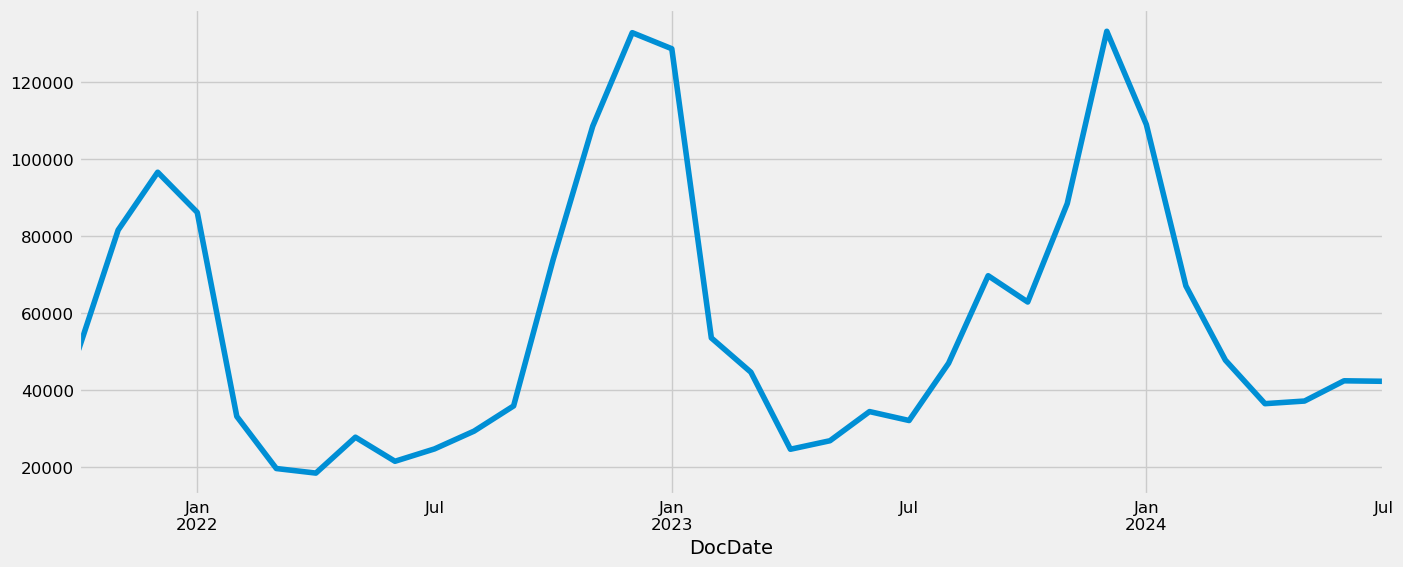

In [448]:
y_cof.plot(figsize=(15,6))
plt.show()

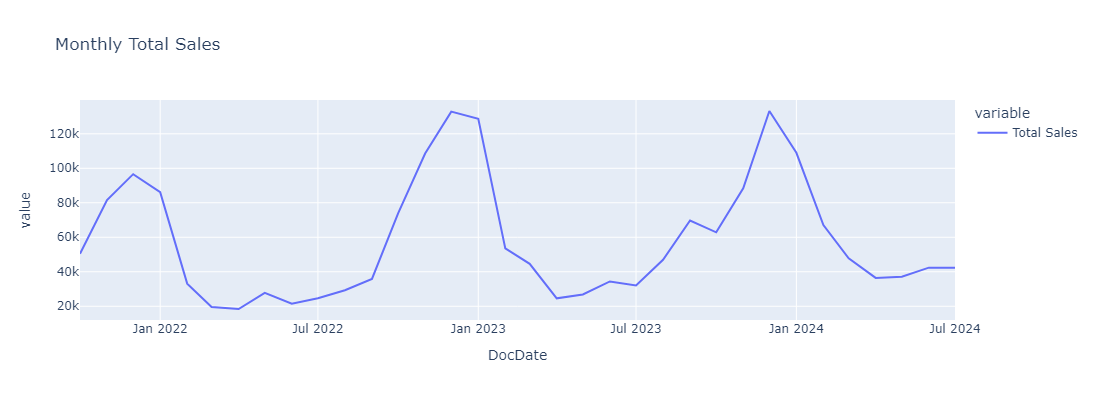

In [450]:
import plotly.express as px

# y = resampled data jo aap ne pehle calculate ki hai
fig = px.line(y_cof, title='Monthly Total Sales')
fig.update_layout(width=800, height=400)  # aap width aur height adjust kar sakte hain
fig.show()

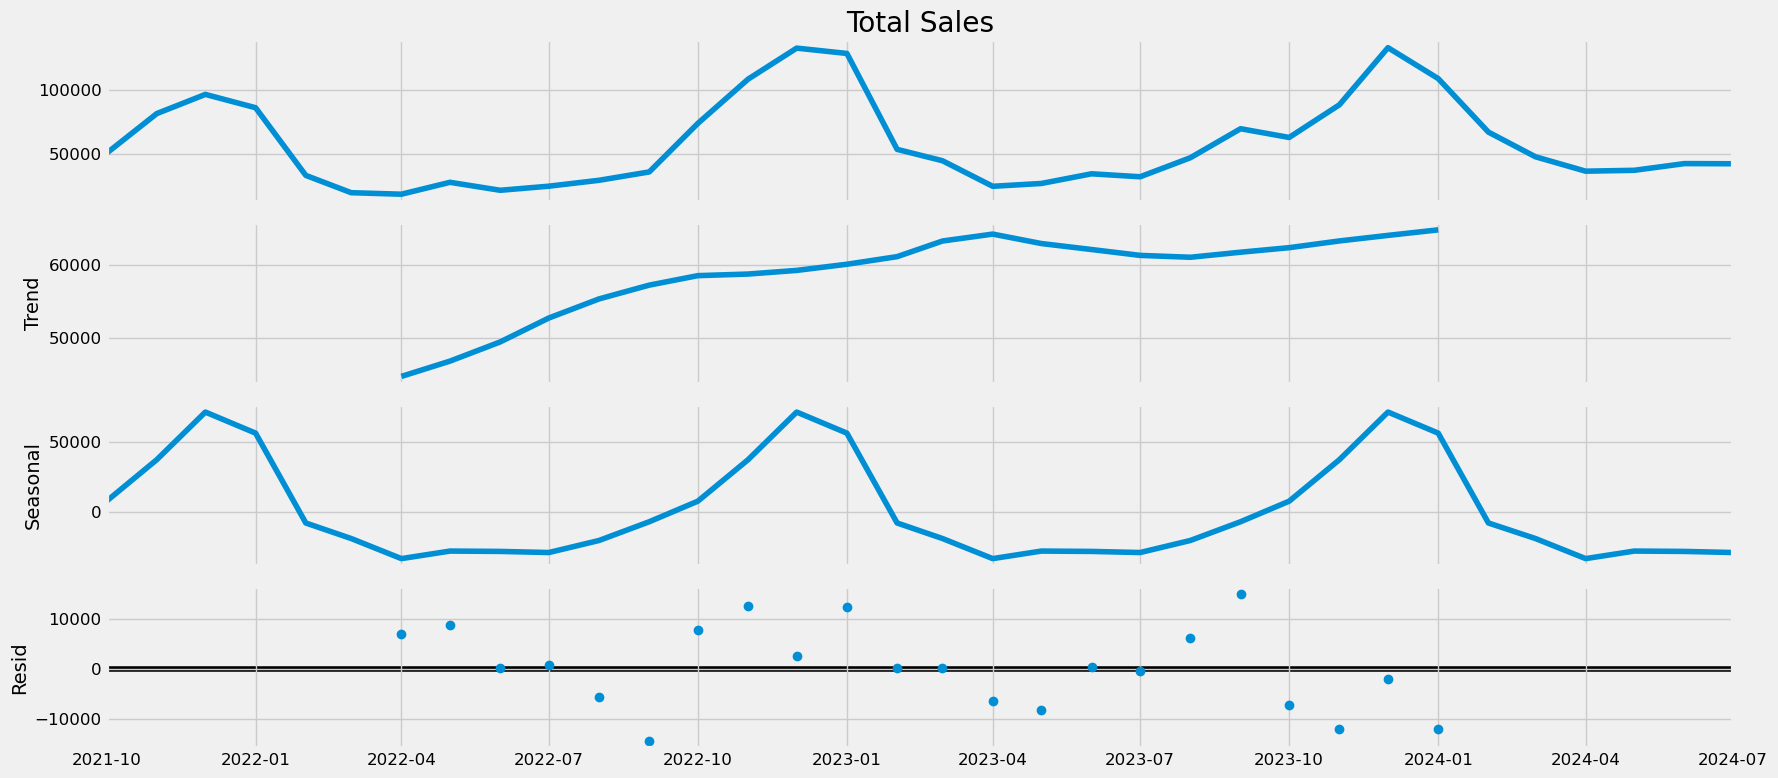

In [454]:
from pylab import rcParams
y_cof = y_cof.fillna(method='ffill')
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y_cof, model='additive')
fig = decomposition.plot()
plt.show()

# MODEL-TRAINING

In [456]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [458]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e:
            print(f"An error occurred: {e}")
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:25504.99344214616
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:24735.20945974309
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:23921.160375975618
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:23430.58896830435
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:23872.361198234827
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:23661.201498869377
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:23443.380207918195
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:23394.471437198903
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:24878.611165219187
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:24464.94787661466
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:23642.75877228037
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:23155.66535011556
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:24412.45989122231
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:24325.30430053908
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:23227.429300023443
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:23149.70476902608
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:23333.755380994007
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:23058.427284638936
A

In [466]:
mod = sm.tsa.statespace.SARIMAX(y_cof,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4927      0.318      1.551      0.121      -0.130       1.115
ma.L1         -0.9724      0.273     -3.567      0.000      -1.507      -0.438
ma.S.L12       0.6291      0.330      1.907      0.056      -0.017       1.276
sigma2      4.842e+08   9.22e-11   5.25e+18      0.000    4.84e+08    4.84e+08


In [468]:
# Step 2: Forecast karna (6 months ka forecast after July)
forecast_steps = 6  # Forecast for 6 months
forecast_values = results.forecast(steps=forecast_steps)

# Step 3: Forecasted values ko DataFrame mein dalna
forecast_index = pd.date_range(start='2024-08-01', periods=forecast_steps, freq='MS')  # Starting from August
forecast_df = pd.DataFrame({'Forecasted Sales': forecast_values}, index=forecast_index)

# Output dikhao
print(forecast_df)

            Forecasted Sales
2024-08-01      58787.057888
2024-09-01      74973.185398
2024-10-01      57903.287748
2024-11-01      66174.484737
2024-12-01      87605.482892
2025-01-01      71078.833502


In [478]:
# Forecast 5 months ahead (August to December)
forecast = results.get_forecast(steps=6)
forecast_df = forecast.summary_frame()

# Display the forecasted values
print(forecast_df)

Total Sales          mean       mean_se  mean_ci_lower  mean_ci_upper
2024-08-01   58787.057888  22037.789062   15593.785028  101980.330747
2024-09-01   74973.185398  24874.621662   26219.822811  123726.547985
2024-10-01   57903.287748  25677.698918    7575.922662  108230.652833
2024-11-01   66174.484737  25958.612778   15296.538604  117052.430871
2024-12-01   87605.482892  26079.486072   36490.629455  138720.336329
2025-01-01   71078.833502  26142.448473   19840.576028  122317.090977


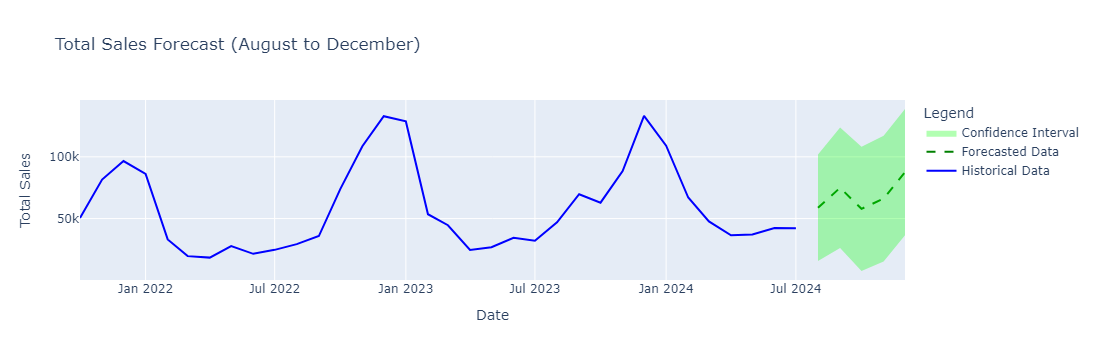

In [476]:
import plotly.graph_objects as go

# Step 1: Create a figure
fig = go.Figure()

# Step 2: Add historical data to the plot
fig.add_trace(go.Scatter(x=y_cof.index, y=y_cof, mode='lines', name='Historical Data', line=dict(color='blue')))

# Step 3: Add forecasted data to the plot
fig.add_trace(go.Scatter(x=forecast_index, 
                         y=forecast_df['mean'], 
                         mode='lines', 
                         name='Forecasted Data', 
                         line=dict(color='green', dash='dash'),
                         hoverinfo='text', 
                         text=forecast_df['mean'].apply(lambda x: f'Sales: {x:.2f}')))

# Step 4: Add confidence intervals
fig.add_trace(go.Scatter(x=forecast_index, 
                         y=forecast_df['mean_ci_lower'], 
                         mode='lines', 
                         line=dict(width=0), 
                         showlegend=False))
fig.add_trace(go.Scatter(x=forecast_index, 
                         y=forecast_df['mean_ci_upper'], 
                         mode='lines', 
                         line=dict(width=0), 
                         fill='tonexty', 
                         fillcolor='rgba(0, 255, 0, 0.3)', 
                         name='Confidence Interval'))

# Step 5: Update layout
fig.update_layout(title='Total Sales Forecast (August to December)',
                  xaxis_title='Date',
                  yaxis_title='Total Sales',
                  legend_title='Legend')

# Step 6: Show the interactive plot
fig.show()


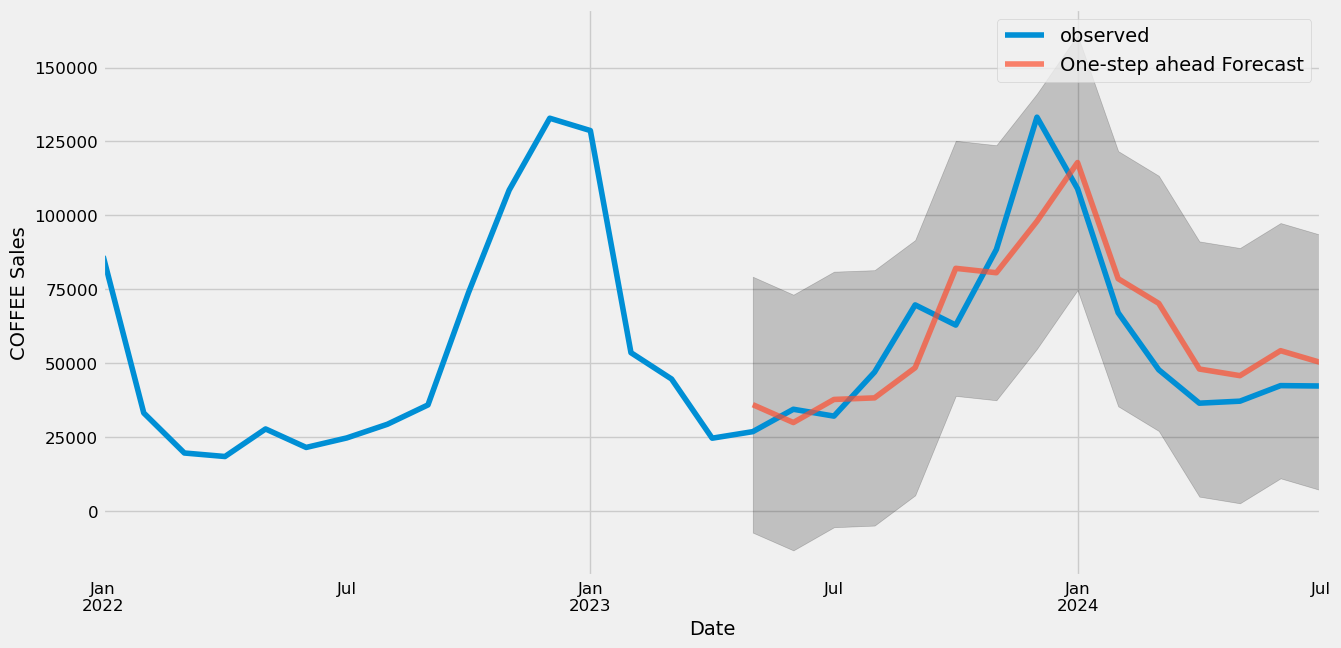

In [484]:
pred = results.get_prediction(start=pd.to_datetime('2023-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y_cof['2022':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('COFFEE Sales')
plt.legend()
plt.show()

In [486]:
pred = results.get_prediction(start=pd.to_datetime('2023-05-01'), dynamic=False)
# pred = results.get_forecast(steps=1)
y_forecasted = pred.predicted_mean
y_truth = y_cof['2023-05-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 230608027.96


In [488]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 15185.78


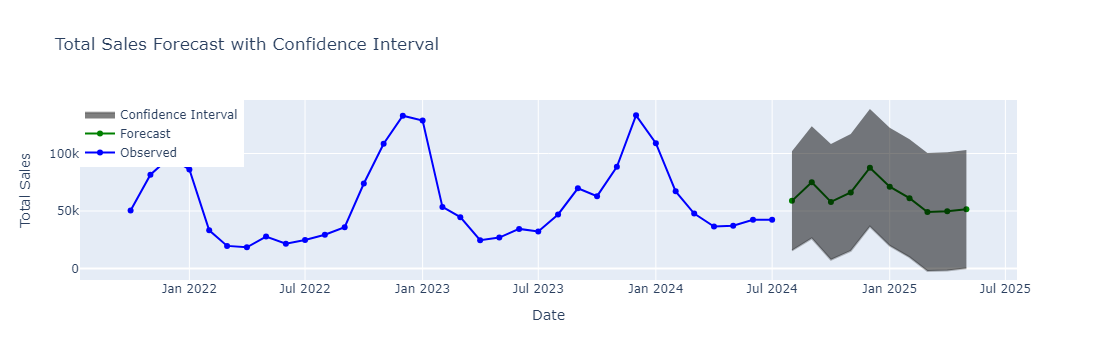

In [490]:
import pandas as pd
import plotly.graph_objects as go

# Assuming 'results' is your fitted SARIMAX model

# Step 1: Get the forecast for the next 10 periods
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()

# Prepare data for the observed and forecasted sales
observed_data = y_cof
forecasted_mean = pred_uc.predicted_mean
forecasted_lower = pred_ci.iloc[:, 0]
forecasted_upper = pred_ci.iloc[:, 1]

# Step 2: Create the Plotly figure
fig = go.Figure()

# Step 3: Add observed data
fig.add_trace(go.Scatter(
    x=observed_data.index,
    y=observed_data,
    mode='lines+markers',
    name='Observed',
    line=dict(color='blue'),
    hoverinfo='text',
    text=[f'Sales: {value:,.2f}' for value in observed_data]
))

# Step 4: Add forecasted data
fig.add_trace(go.Scatter(
    x=forecasted_mean.index,
    y=forecasted_mean,
    mode='lines+markers',
    name='Forecast',
    line=dict(color='green'),
    hoverinfo='text',
    text=[f'Forecast: {value:,.2f}' for value in forecasted_mean]
))

# Step 5: Add confidence intervals
fig.add_trace(go.Scatter(
    x=pred_ci.index,
    y=forecasted_upper,
    fill=None,
    mode='lines',
    line=dict(color='rgba(0,0,0,0)'),
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=pred_ci.index,
    y=forecasted_lower,
    fill='tonexty',
    mode='lines',
    line=dict(color='rgba(0,0,0,0.25)'),
    name='Confidence Interval'
))

# Step 6: Customize layout
fig.update_layout(
    title='Total Sales Forecast with Confidence Interval',
    xaxis_title='Date',
    yaxis_title='Total Sales',
    legend=dict(x=0, y=1),
    hovermode='closest'
)

# Step 7: Show the plot
fig.show()


# FOR SOUP FORECASTING 

# Data-Preprocessing

In [493]:
df.columns

Index(['DocDate', 'Product Description', 'Total Sales', 'Group', 'GroupCode',
       'Category2', 'Brand'],
      dtype='object')

In [495]:
df['Category2'].value_counts()

Category2
Dry Fruits    51242
Coffee        19194
Soup           7043
Name: count, dtype: int64

In [497]:
Soup = df.loc[df['Category2']=='Soup']

In [503]:
Soup['DocDate'].min(),Soup['DocDate'].max()

(Timestamp('2021-10-01 00:00:00'), Timestamp('2024-07-30 00:00:00'))

In [505]:
Soup = Soup.sort_values('DocDate')

In [507]:
cols= ['Product Description', 'Group', 'GroupCode', 'Category2', 'Brand']
Soup.drop(cols, axis=1, inplace=True)
Soup.isnull().sum()

DocDate        0
Total Sales    0
dtype: int64

In [513]:
Soup = Soup.groupby('DocDate')['Total Sales'].sum().reset_index()

In [519]:
Soup = Soup.set_index('DocDate')
Soup.index

DatetimeIndex(['2021-10-01', '2021-10-02', '2021-10-03', '2021-10-04',
               '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-09', '2021-10-10',
               ...
               '2024-07-21', '2024-07-22', '2024-07-23', '2024-07-24',
               '2024-07-25', '2024-07-26', '2024-07-27', '2024-07-28',
               '2024-07-29', '2024-07-30'],
              dtype='datetime64[ns]', name='DocDate', length=1013, freq=None)

In [521]:
y_soup = Soup['Total Sales'].resample('MS').mean()

In [523]:
y_soup['2021':]

DocDate
2021-10-01     7903.366667
2021-11-01    26766.033333
2021-12-01    23717.636035
2022-01-01    22701.788540
2022-02-01     5343.964286
2022-03-01     2721.967742
2022-04-01     1153.333333
2022-05-01     1668.035714
2022-06-01     1597.133333
2022-07-01     1907.469771
2022-08-01     1767.695531
2022-09-01     2207.573894
2022-10-01     8785.611489
2022-11-01    15463.193558
2022-12-01    21676.453060
2023-01-01    20682.466456
2023-02-01     6385.215505
2023-03-01     2217.153473
2023-04-01     1839.947367
2023-05-01     1448.157792
2023-06-01     1930.842807
2023-07-01     4649.906163
2023-08-01     3605.136465
2023-09-01     4512.182108
2023-10-01     4053.935023
2023-11-01    12716.522677
2023-12-01    25682.283742
2024-01-01    32776.140436
2024-02-01     9433.772351
2024-03-01    17039.320729
2024-04-01    87166.268200
2024-05-01    77146.806459
2024-06-01    20960.731526
2024-07-01    29199.188357
Freq: MS, Name: Total Sales, dtype: float64

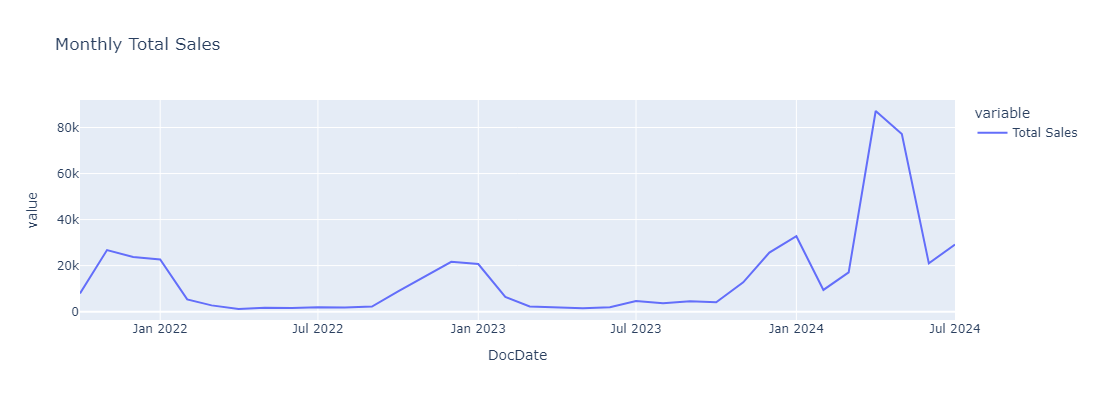

In [525]:
import plotly.express as px

# y = resampled data jo aap ne pehle calculate ki hai
fig = px.line(y_soup, title='Monthly Total Sales')
fig.update_layout(width=800, height=400)  # aap width aur height adjust kar sakte hain
fig.show()

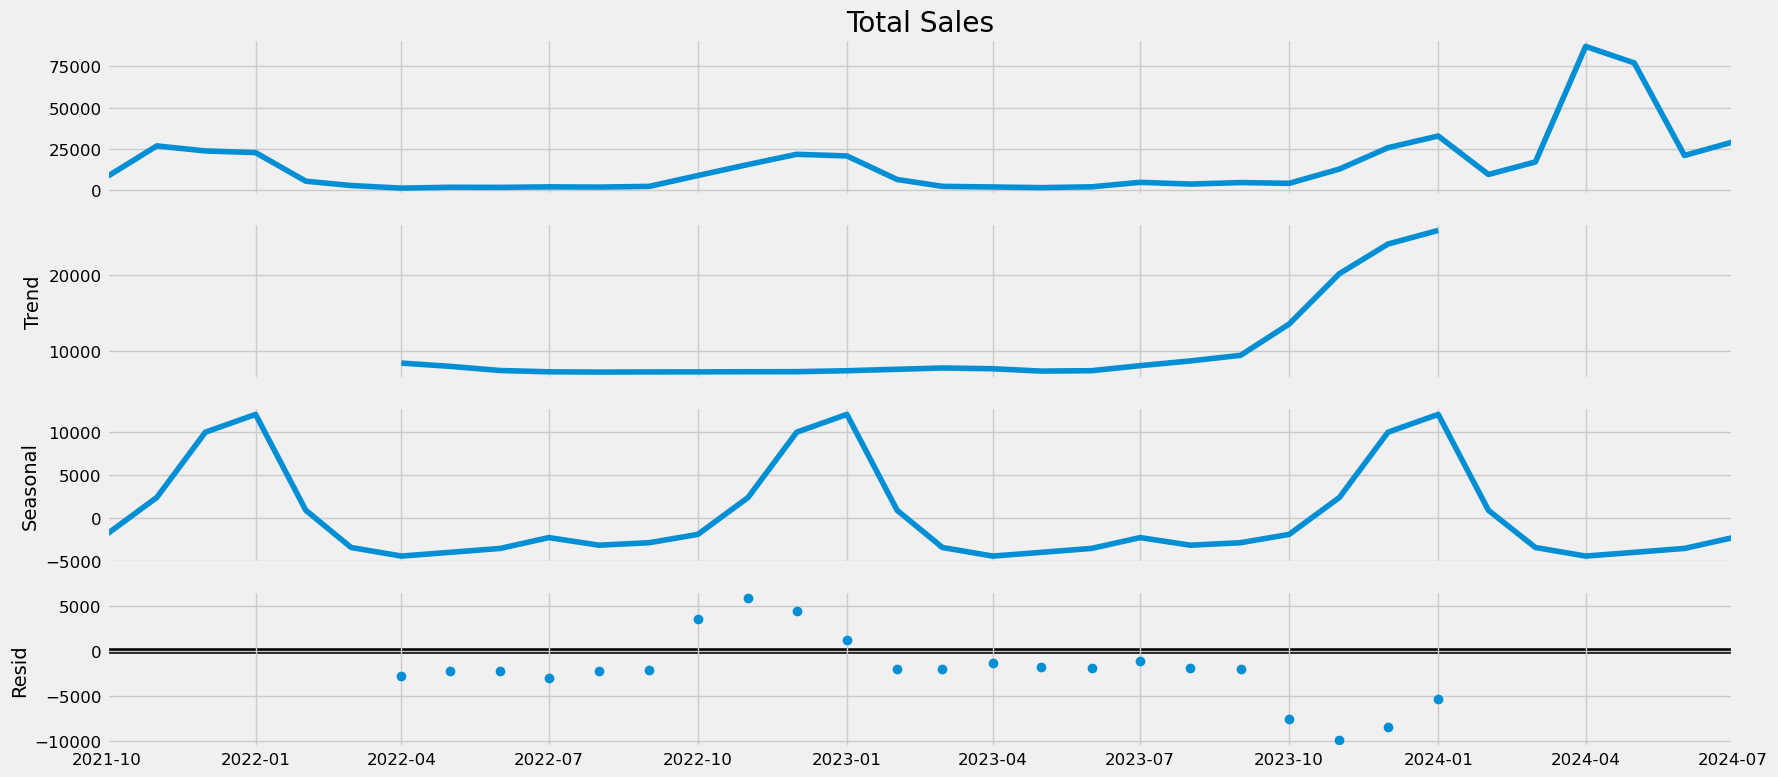

In [527]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y_soup, model='additive')
fig = decomposition.plot()
plt.show()

# MODEL-TRAINING

In [529]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [532]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_soup,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e:
            print(f"An error occurred: {e}")
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:763.5039430077595
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:501.73537430785257
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:489.3019105141652
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:220.2594016836715
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:513.193536549691
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:497.9888652332705
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:243.20262732792293
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:221.99502556058508
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:718.4484015471057
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:455.3044213609466
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:451.8012939168118
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:191.8238194090556
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:496.3730770715527
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:454.3651004194906
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:235.19838735376166
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:192.89065057707953
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:718.1643744221644
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:461.45434533166355
ARIMA

In [540]:
mod = sm.tsa.statespace.SARIMAX(y_soup,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2080      0.278     -0.749      0.454      -0.752       0.336
ma.L1          0.9882      0.405      2.442      0.015       0.195       1.781
ma.S.L12       0.2267      4.090      0.055      0.956      -7.790       8.244
sigma2      4.955e+08   1.38e-08    3.6e+16      0.000    4.95e+08    4.95e+08


In [542]:
# Step 2: Forecast karna (6 months ka forecast after July)
forecast_steps = 6  # Forecast for 6 months
forecast_values = results.forecast(steps=forecast_steps)

# Step 3: Forecasted values ko DataFrame mein dalna
forecast_index = pd.date_range(start='2024-08-01', periods=forecast_steps, freq='MS')  # Starting from August
forecast_df = pd.DataFrame({'Forecasted Sales': forecast_values}, index=forecast_index)

# Output dikhao
print(forecast_df)

            Forecasted Sales
2024-08-01      40805.255732
2024-09-01      39127.854725
2024-10-01      37560.108364
2024-11-01      47397.016383
2024-12-01      61416.031256
2025-01-01      70314.788173


In [546]:
# Forecast 5 months ahead (August to December)
forecast = results.get_forecast(steps=7)
forecast_df = forecast.summary_frame()

# Display the forecasted values
print(forecast_df)

Total Sales          mean       mean_se  mean_ci_lower  mean_ci_upper
2024-08-01   40805.255732  22355.053989   -3009.844959   84620.356422
2024-09-01   39127.854725  45477.634531  -50006.671058  128262.380507
2024-10-01   37560.108364  58012.601718  -76142.501652  151262.718381
2024-11-01   47397.016383  68679.989358  -87213.289217  182007.321982
2024-12-01   61416.031256  77827.062473  -91122.208215  213954.270726
2025-01-01   70314.788173  86020.607475  -98282.504407  238912.080753
2025-02-01   44573.987795  93496.100684 -138675.002241  227822.977831


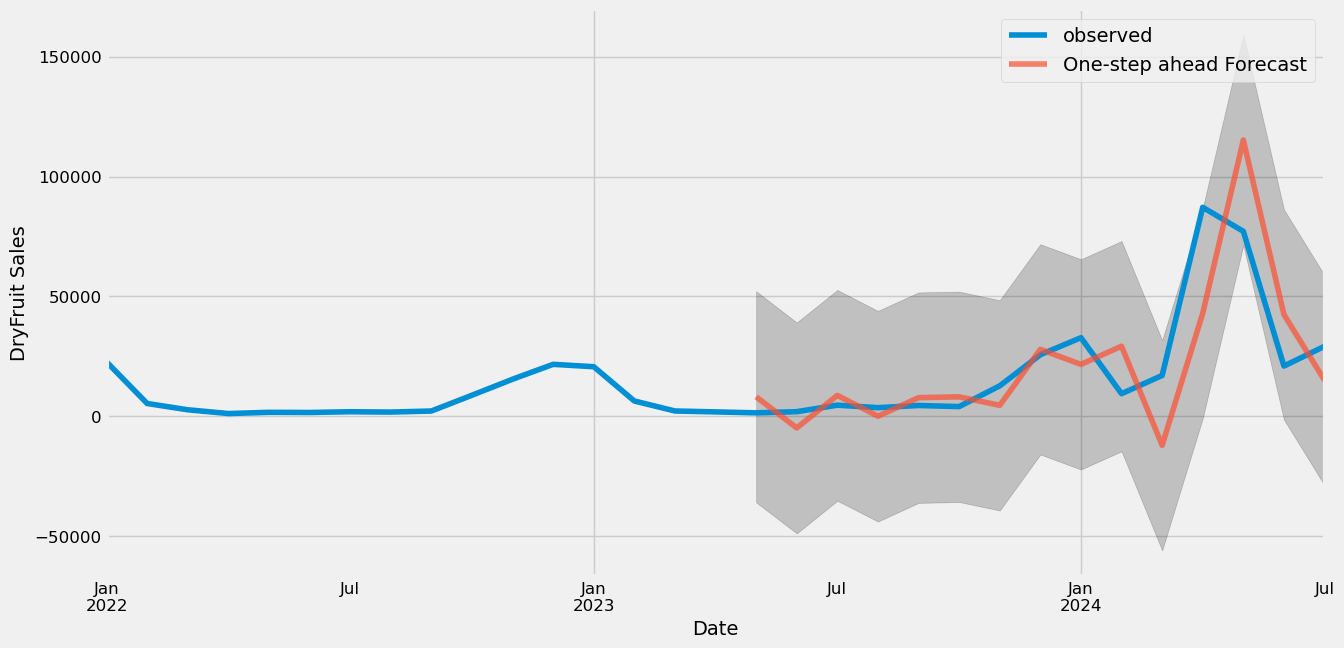

In [550]:
pred = results.get_prediction(start=pd.to_datetime('2023-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y_soup['2022':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('DryFruit Sales')
plt.legend()
plt.show()

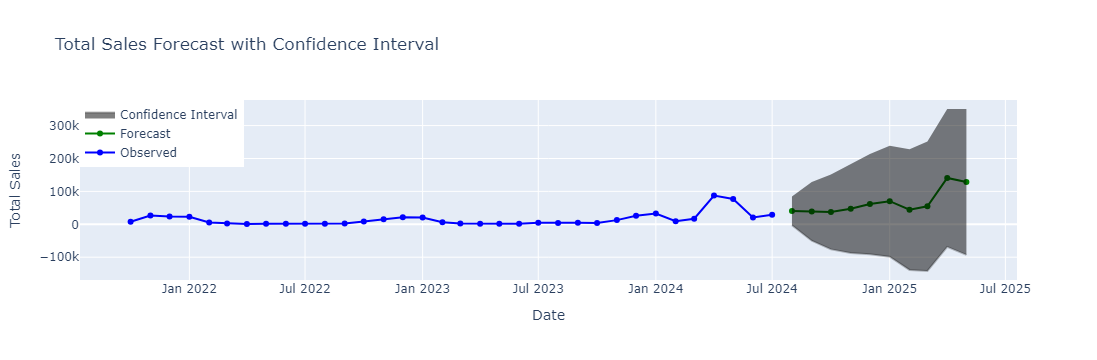

In [552]:
import pandas as pd
import plotly.graph_objects as go

# Assuming 'results' is your fitted SARIMAX model

# Step 1: Get the forecast for the next 10 periods
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()

# Prepare data for the observed and forecasted sales
observed_data = y_soup
forecasted_mean = pred_uc.predicted_mean
forecasted_lower = pred_ci.iloc[:, 0]
forecasted_upper = pred_ci.iloc[:, 1]

# Step 2: Create the Plotly figure
fig = go.Figure()

# Step 3: Add observed data
fig.add_trace(go.Scatter(
    x=observed_data.index,
    y=observed_data,
    mode='lines+markers',
    name='Observed',
    line=dict(color='blue'),
    hoverinfo='text',
    text=[f'Sales: {value:,.2f}' for value in observed_data]
))

# Step 4: Add forecasted data
fig.add_trace(go.Scatter(
    x=forecasted_mean.index,
    y=forecasted_mean,
    mode='lines+markers',
    name='Forecast',
    line=dict(color='green'),
    hoverinfo='text',
    text=[f'Forecast: {value:,.2f}' for value in forecasted_mean]
))

# Step 5: Add confidence intervals
fig.add_trace(go.Scatter(
    x=pred_ci.index,
    y=forecasted_upper,
    fill=None,
    mode='lines',
    line=dict(color='rgba(0,0,0,0)'),
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=pred_ci.index,
    y=forecasted_lower,
    fill='tonexty',
    mode='lines',
    line=dict(color='rgba(0,0,0,0.25)'),
    name='Confidence Interval'
))

# Step 6: Customize layout
fig.update_layout(
    title='Total Sales Forecast with Confidence Interval',
    xaxis_title='Date',
    yaxis_title='Total Sales',
    legend=dict(x=0, y=1),
    hovermode='closest'
)

# Step 7: Show the plot
fig.show()


In [1]:
import pandas as pd 
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'
!pip install Pyppeteer
!Pyppeteer-install

     ---------------------------------------- 0.0/50.1 kB ? eta -:--:--
     -------- ------------------------------- 10.2/50.1 kB ? eta -:--:--
     -------- ------------------------------- 10.2/50.1 kB ? eta -:--:--
     --------------- ---------------------- 20.5/50.1 kB 165.2 kB/s eta 0:00:01
     ------------------------------- ------ 41.0/50.1 kB 217.9 kB/s eta 0:00:01
     ------------------------------- ------ 41.0/50.1 kB 217.9 kB/s eta 0:00:01
     ------------------------------- ------ 41.0/50.1 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 50.1/50.1 kB 141.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/84.9 kB ? eta -:--:--
     ------------------- -------------------- 41.0/84.9 kB 2.0 MB/s eta 0:00:01
     ------------------------------------ - 81.9/84.9 kB 762.6 kB/s eta 0:00:01
     ------------------------------------ - 81.9/84.9 kB 762.6 kB/s eta 0:00:01
     -------------------------------------- 84.9/84.9 kB 367.7 kB/s et

[INFO] Starting Chromium download.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\DSM\anaconda3\Scripts\pyppeteer-install.exe\__main__.py", line 7, in <module>
  File "C:\Users\DSM\anaconda3\Lib\site-packages\pyppeteer\command.py", line 14, in install
    download_chromium()
  File "C:\Users\DSM\anaconda3\Lib\site-packages\pyppeteer\chromium_downloader.py", line 138, in download_chromium
    extract_zip(download_zip(get_url()), DOWNLOADS_FOLDER / REVISION)
                ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DSM\anaconda3\Lib\site-packages\pyppeteer\chromium_downloader.py", line 82, in download_zip
    raise OSError(f'Chromium downloadable not found at {url}: ' f'Received {r.data.decode()}.\n')
OSError: Chromium downloadable not found at https://storage.googleapis.com/chromium-browser-snapshots/Win_x64/1181205/chrome-win.zip: Received <?xml version='1.0' encoding='UTF-8'?><